<h1><b><center>Kidney disease Prediction</center></b></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from numpy import loadtxt
from keras.models import load_model
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

# Plot an ROC. pred - the predictions, y - the expected output.
def plot_roc(pred,y):
    fpr, tpr, thresholds = roc_curve(y, pred)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv(r"C:\Users\prera\Desktop\FinalProject\data\kidney_disease.csv")

In [5]:
df.head(50).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
id,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
age,48.0,7.0,62.0,48.0,51.0,60.0,68.0,24.0,52.0,53.0,...,46.0,45.0,47.0,35.0,54.0,54.0,48.0,11.0,73.0,60.0
bp,80.0,50.0,80.0,70.0,80.0,90.0,70.0,NaN,100.0,90.0,...,90.0,70.0,100.0,80.0,80.0,80.0,70.0,80.0,70.0,70.0
sg,1.02,1.02,1.01,1.005,1.01,1.015,1.01,1.015,1.015,1.02,...,1.01,1.01,1.01,1.01,1.01,1.02,1.015,1.01,1.005,1.01
al,1.0,4.0,2.0,4.0,2.0,3.0,0.0,2.0,3.0,2.0,...,2.0,0.0,0.0,1.0,3.0,3.0,0.0,3.0,0.0,2.0
su,0.0,0.0,3.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rbc,NaN,NaN,normal,normal,normal,NaN,NaN,normal,normal,abnormal,...,normal,NaN,NaN,abnormal,abnormal,NaN,NaN,NaN,normal,normal
pc,normal,normal,normal,abnormal,normal,NaN,normal,abnormal,abnormal,abnormal,...,abnormal,normal,normal,NaN,abnormal,abnormal,normal,normal,normal,abnormal
pcc,notpresent,notpresent,notpresent,present,notpresent,notpresent,notpresent,notpresent,present,present,...,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,present
ba,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,...,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent,notpresent


In [6]:
df.drop(["id"],axis=1,inplace=True) 

In [7]:
df.shape

(400, 25)

In [8]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
col_dict={"bp":"blood_pressure",
          "sg":"specific_gravity",
          "al":"albumin",
          "su":"sugar",
          "rbc":"red_blood_cells",
          "pc":"pus_cell",
          "pcc":"pus_cell_clumps",
          "ba":"bacteria",
          "bgr":"blood_glucose_random",
          "bu":"blood_urea",
          "sc":"serum_creatinine",
          "sod":"sodium",
          "pot":"potassium",
          "hemo":"hemoglobin",
          "pcv":"packed_cell_volume",
          "wc":"white_blood_cell_count",
          "rc":"red_blood_cell_count",
          "htn":"hypertension",
          "dm":"diabetes_mellitus",
          "cad":"coronary_artery_disease",
          "appet":"appetite",
          "pe":"pedal_edema",
          "ane":"anemia"}

df.rename(columns=col_dict, inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [11]:
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')

In [12]:
for i in df.columns:
    print(f'{i} : {df[i].nunique()} values')

age : 76 values
blood_pressure : 10 values
specific_gravity : 5 values
albumin : 6 values
sugar : 6 values
red_blood_cells : 2 values
pus_cell : 2 values
pus_cell_clumps : 2 values
bacteria : 2 values
blood_glucose_random : 146 values
blood_urea : 118 values
serum_creatinine : 84 values
sodium : 34 values
potassium : 40 values
hemoglobin : 115 values
packed_cell_volume : 42 values
white_blood_cell_count : 89 values
red_blood_cell_count : 45 values
hypertension : 2 values
diabetes_mellitus : 5 values
coronary_artery_disease : 3 values
appetite : 2 values
pedal_edema : 2 values
anemia : 2 values
classification : 3 values


In [13]:
for feats in df.columns:
    print(f'{feats} has {df[feats].unique()} categories.\n')

age has [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.] categories.

blood_pressure has [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.] categories.

specific_gravity has [1.02  1.01  1.005 1.015   nan 1.025] categories.

albumin has [ 1.  4.  2.  3.  0. nan  5.] categories.

sugar has [ 0.  3.  4.  1. nan  2.  5.] categories.

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

blood_glucose_random has [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 

In [14]:
df['diabetes_mellitus'] = df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'})
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['classification'] = df['classification'].replace(to_replace = 'ckd\t', value = 'ckd')

In [15]:
numerical_features = []
categorical_features = []

for i in df.columns:
    if df[i].nunique()>=5:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

In [16]:
print(len(numerical_features),'Numerical features: \n', numerical_features)
print('\n\n',len(categorical_features),'Categorical features:\n ', categorical_features)

14 Numerical features: 
 ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium', 'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']


 11 Categorical features:
  ['red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia', 'classification']


In [17]:
df[categorical_features].dtypes

red_blood_cells            object
pus_cell                   object
pus_cell_clumps            object
bacteria                   object
hypertension               object
diabetes_mellitus          object
coronary_artery_disease    object
appetite                   object
pedal_edema                object
anemia                     object
classification             object
dtype: object

In [18]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,391.0,NaN,NaN,NaN,51.483376,17.169714,2.0,42.0,55.0,64.5,90.0
blood_pressure,388.0,NaN,NaN,NaN,76.469072,13.683637,50.0,70.0,80.0,80.0,180.0
specific_gravity,353.0,NaN,NaN,NaN,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
albumin,354.0,NaN,NaN,NaN,1.016949,1.352679,0.0,0.0,0.0,2.0,5.0
sugar,351.0,NaN,NaN,NaN,0.450142,1.099191,0.0,0.0,0.0,0.0,5.0
red_blood_cells,248,2,normal,201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell,335,2,normal,259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pus_cell_clumps,396,2,notpresent,354,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bacteria,396,2,notpresent,374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blood_glucose_random,356.0,NaN,NaN,NaN,148.036517,79.281714,22.0,99.0,121.0,163.0,490.0


In [19]:
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
hemoglobin                  52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
classification               0
dtype: int64

# EDA

# Target Class

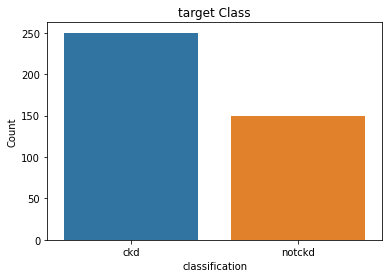

Percent of chronic kidney disease sample:  62.5 %
Percent of not a chronic kidney disease sample:  37.5 %


In [20]:
sns.countplot(x='classification',data=df)
plt.xlabel("classification")
plt.ylabel("Count")
plt.title("target Class")
plt.show()
print('Percent of chronic kidney disease sample: ',round(len(df[df['classification']=='ckd'])/len(df['classification'])*100,2),"%")
print('Percent of not a chronic kidney disease sample: ',round(len(df[df['classification']=='notckd'])/len(df['classification'])*100,2),"%")

# Numerical features

# Imputing numerical coulmns using MICE


https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html

https://medium.com/@WalePhenomenon/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87

In [21]:
((df[numerical_features].isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

red_blood_cell_count      32.75
white_blood_cell_count    26.50
potassium                 22.00
sodium                    21.75
packed_cell_volume        17.75
hemoglobin                13.00
sugar                     12.25
specific_gravity          11.75
albumin                   11.50
blood_glucose_random      11.00
blood_urea                 4.75
serum_creatinine           4.25
blood_pressure             3.00
age                        2.25
dtype: float64

In [23]:
mice_imputer = IterativeImputer() 

df[numerical_features] = mice_imputer.fit_transform(df[numerical_features]) 

In [24]:
df[numerical_features].isnull().sum().sort_values(ascending=False)

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
hemoglobin                0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

# Correlation

In [25]:
df.dtypes

age                        float64
blood_pressure             float64
specific_gravity           float64
albumin                    float64
sugar                      float64
red_blood_cells             object
pus_cell                    object
pus_cell_clumps             object
bacteria                    object
blood_glucose_random       float64
blood_urea                 float64
serum_creatinine           float64
sodium                     float64
potassium                  float64
hemoglobin                 float64
packed_cell_volume         float64
white_blood_cell_count     float64
red_blood_cell_count       float64
hypertension                object
diabetes_mellitus           object
coronary_artery_disease     object
appetite                    object
pedal_edema                 object
anemia                      object
classification              object
dtype: object

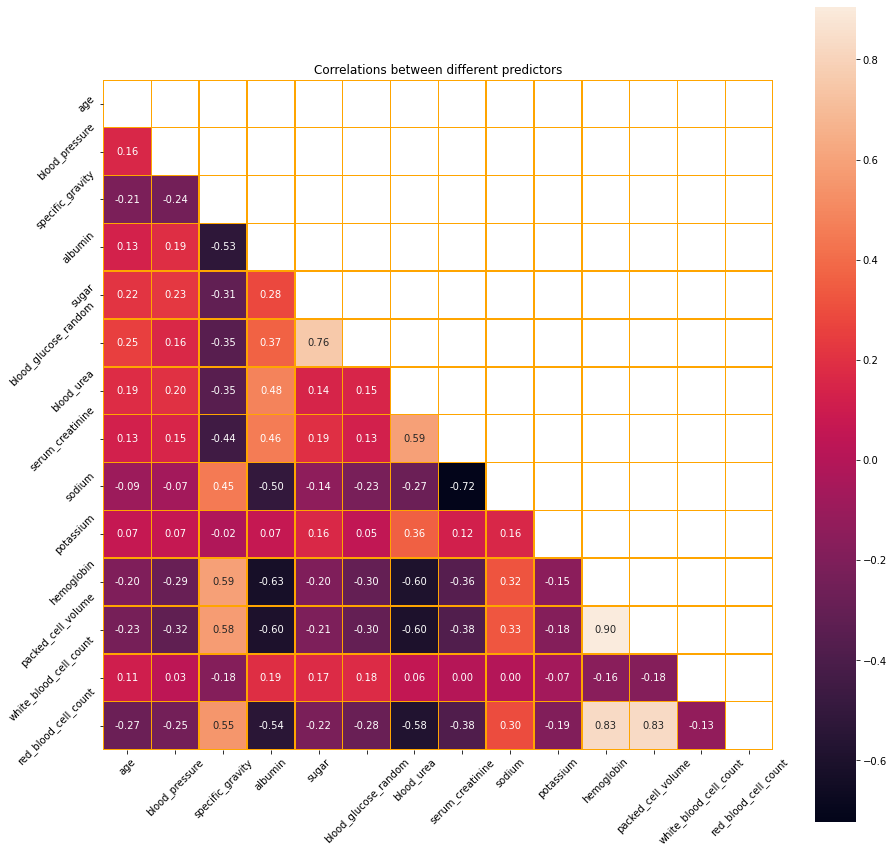

In [26]:
corr_df = df.corr()
f,ax=plt.subplots(figsize=(15,15))
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df,annot=True,fmt=".2f",ax=ax,linewidths=0.5,linecolor="orange", mask = mask, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.title('Correlations between different predictors')
plt.show()

(14.5, -0.5)

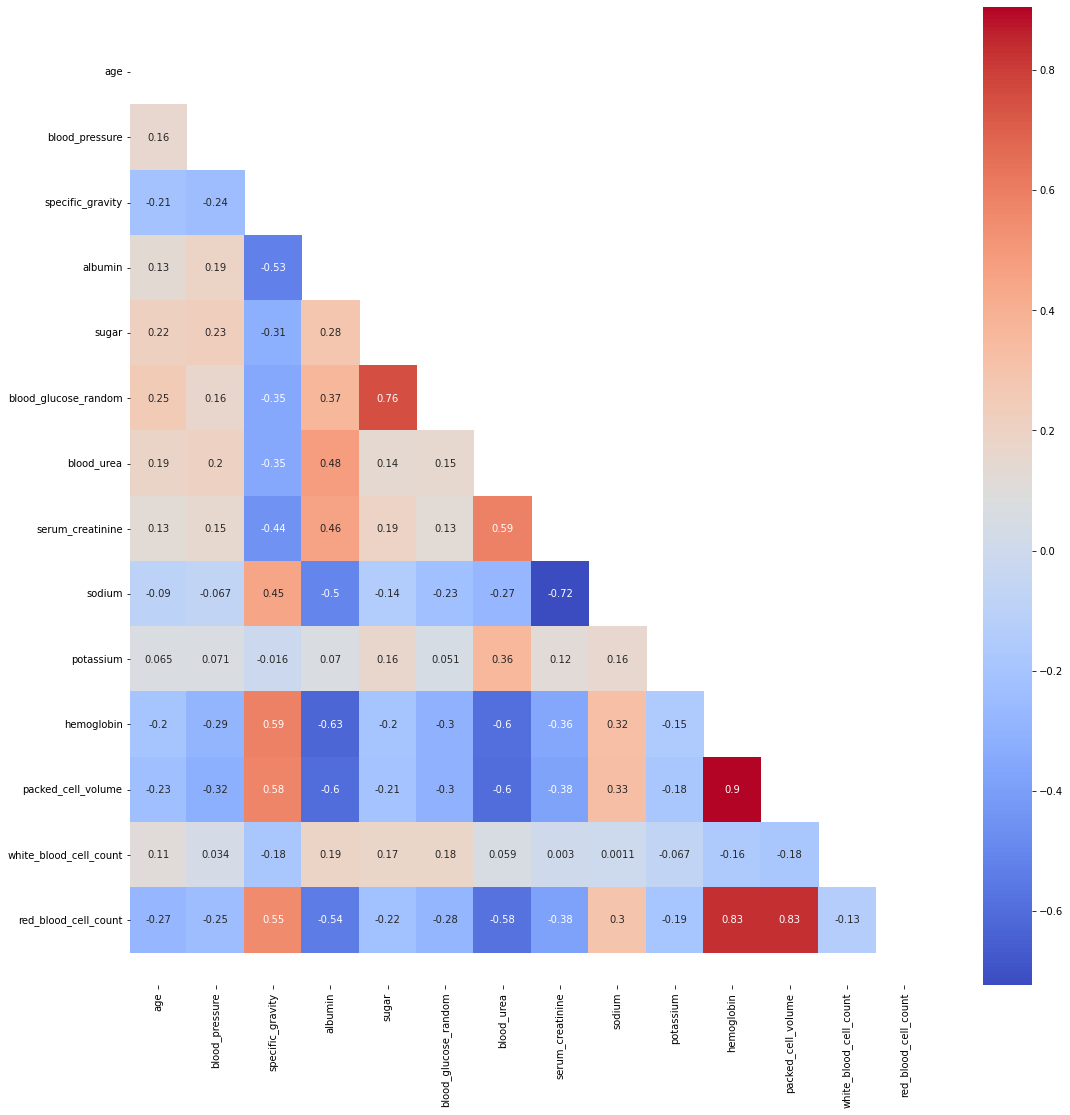

In [27]:
corr_df = df.corr()
fig, ax = plt.subplots(figsize=(18,18)) 
matrix = np.triu(corr_df)
sns.heatmap(corr_df, annot=True, cmap= 'coolwarm', ax=ax, mask = matrix)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Categorical features

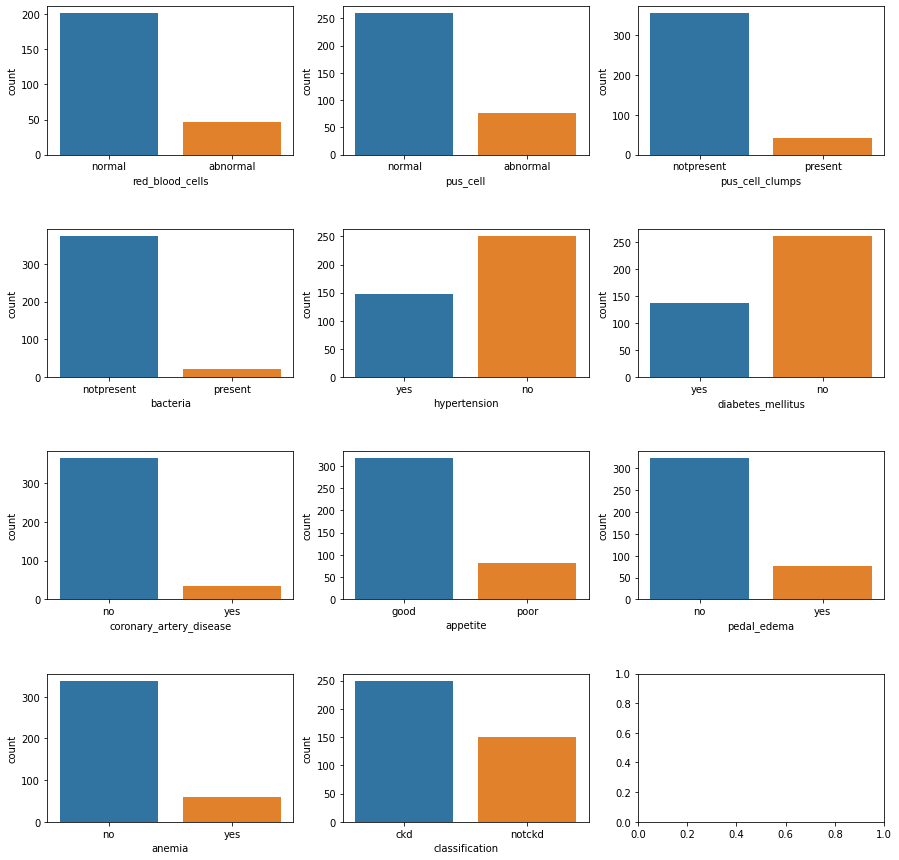

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15,15))
fig.subplots_adjust(hspace=0.5)

for ax, feats in zip(axes.flatten(), categorical_features):
    sns.countplot(df[feats], ax=ax)

# Imputing Categorical coulmns using KNN imputer

Encoding categorical columns to use in knn imputer

In [29]:
for feats in categorical_features:
    print(f'{feats} has {df[feats].unique()} categories.\n')

red_blood_cells has [nan 'normal' 'abnormal'] categories.

pus_cell has ['normal' 'abnormal' nan] categories.

pus_cell_clumps has ['notpresent' 'present' nan] categories.

bacteria has ['notpresent' 'present' nan] categories.

hypertension has ['yes' 'no' nan] categories.

diabetes_mellitus has ['yes' 'no' nan] categories.

coronary_artery_disease has ['no' 'yes' nan] categories.

appetite has ['good' 'poor' nan] categories.

pedal_edema has ['no' 'yes' nan] categories.

anemia has ['no' 'yes' nan] categories.

classification has ['ckd' 'notckd'] categories.



In [30]:
df['red_blood_cells']=df['red_blood_cells'].replace({'normal':0,'abnormal':1})
df['pus_cell']=df['pus_cell'].replace({'normal':0,'abnormal':1})
df['pus_cell_clumps']=df['pus_cell_clumps'].replace({'notpresent':0,'present':1})
df['bacteria']=df['bacteria'].replace({'notpresent':0,'present':1})
df['hypertension']=df['hypertension'].replace({'no':0,'yes':1})
df['diabetes_mellitus']=df['diabetes_mellitus'].replace({'no':0,'yes':1})
df['coronary_artery_disease']=df['coronary_artery_disease'].replace({'no':0,'yes':1})
df['appetite']=df['appetite'].replace({'poor':0,'good':1})
df['pedal_edema']=df['pedal_edema'].replace({'no':0,'yes':1})
df['anemia']=df['anemia'].replace({'no':0,'yes':1})
df['classification']=df['classification'].replace({'notckd':0,'ckd':1})

In [31]:
df.isna().sum().sort_values(ascending=False)

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
coronary_artery_disease      2
diabetes_mellitus            2
hypertension                 2
anemia                       1
pedal_edema                  1
appetite                     1
age                          0
packed_cell_volume           0
red_blood_cell_count         0
white_blood_cell_count       0
sodium                       0
hemoglobin                   0
potassium                    0
blood_pressure               0
serum_creatinine             0
blood_urea                   0
blood_glucose_random         0
sugar                        0
albumin                      0
specific_gravity             0
classification               0
dtype: int64

In [32]:
((df[categorical_features].isnull().sum()/df.shape[0])*100).sort_values(ascending=False)

red_blood_cells            38.00
pus_cell                   16.25
pus_cell_clumps             1.00
bacteria                    1.00
hypertension                0.50
diabetes_mellitus           0.50
coronary_artery_disease     0.50
appetite                    0.25
pedal_edema                 0.25
anemia                      0.25
classification              0.00
dtype: float64

In [33]:
categorical_features=list(set(df[categorical_features])-set(["classification"]))
print(categorical_features)

['pedal_edema', 'appetite', 'coronary_artery_disease', 'pus_cell', 'pus_cell_clumps', 'diabetes_mellitus', 'red_blood_cells', 'anemia', 'hypertension', 'bacteria']


In [34]:
knnimputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')

knnimputer.fit(df[categorical_features])

df[categorical_features]=knnimputer.transform(df[categorical_features])

In [35]:
df.isna().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
classification             0
dtype: int64

In [36]:
df.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'classification'],
      dtype='object')

In [37]:
df = df[['age', 'blood_pressure', 'sugar', 'pus_cell', 'pus_cell_clumps', 'sodium', 'hemoglobin', 'hypertension', 'diabetes_mellitus', 'classification']]

In [38]:
df.head()

,age,blood_pressure,sugar,pus_cell,pus_cell_clumps,sodium,hemoglobin,hypertension,diabetes_mellitus,classification
0,48.0,80.0,0.0,0.0,0.0,139.737294,15.4,1.0,1.0,1
1,7.0,50.0,0.0,0.0,0.0,130.969237,11.3,0.0,0.0,1
2,62.0,80.0,3.0,0.0,0.0,132.670950,9.6,0.0,1.0,1
3,48.0,70.0,0.0,1.0,1.0,111.000000,11.2,1.0,0.0,1
4,51.0,80.0,0.0,0.0,0.0,135.843529,11.6,0.0,0.0,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                400 non-null    float64
 1   blood_pressure     400 non-null    float64
 2   sugar              400 non-null    float64
 3   pus_cell           400 non-null    float64
 4   pus_cell_clumps    400 non-null    float64
 5   sodium             400 non-null    float64
 6   hemoglobin         400 non-null    float64
 7   hypertension       400 non-null    float64
 8   diabetes_mellitus  400 non-null    float64
 9   classification     400 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 31.4 KB


# Splitting into X and y

In [40]:
x = df.drop('classification', axis=1)
y = df.classification

In [41]:
y.value_counts()

1    250
0    150
Name: classification, dtype: int64

In [42]:
sc = MinMaxScaler()
x = sc.fit_transform(x)
x

array([[0.52272727, 0.23076923, 0.09967541, ..., 0.83673469, 1.        ,
        1.        ],
       [0.05681818, 0.        , 0.09967541, ..., 0.55782313, 0.        ,
        0.        ],
       [0.68181818, 0.23076923, 0.63987016, ..., 0.44217687, 0.        ,
        1.        ],
       ...,
       [0.11363636, 0.23076923, 0.09967541, ..., 0.86394558, 0.        ,
        0.        ],
       [0.17045455, 0.07692308, 0.09967541, ..., 0.75510204, 0.        ,
        0.        ],
       [0.63636364, 0.23076923, 0.09967541, ..., 0.86394558, 0.        ,
        0.        ]])

# SMOTE

In [43]:
print(Counter(y))

Counter({1: 250, 0: 150})


In [44]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [45]:
Counter(y)

Counter({1: 250, 0: 250})

# Train-Test Split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0, shuffle=True)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 9)
(100, 9)
(400,)
(100,)


In [48]:
x_test_1=x_test[1,]

In [49]:
x_test_1=x_test_1.reshape(1,-1)

In [50]:
x_test_1

array([[0.55681818, 0.07692308, 0.09967541, 0.        , 0.        ,
        0.82334385, 0.67346939, 0.        , 0.        ]])

# Logistic Regression

In [51]:
kidneylr=LogisticRegression(solver="liblinear")
kidneylr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [52]:
# Accuracy
y_pred = kidneylr.predict(x_test)
print('Accuracy of logistic regression classifier on test set:',kidneylr.score(x_test, y_test))

Accuracy of logistic regression classifier on test set: 0.91


[[51  0]
 [ 9 40]]


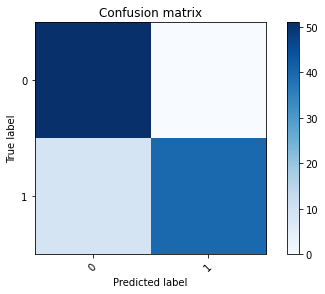

In [53]:
# Print and plot confusion matrix   
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [54]:
# Print Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        51
           1       1.00      0.82      0.90        49

    accuracy                           0.91       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100



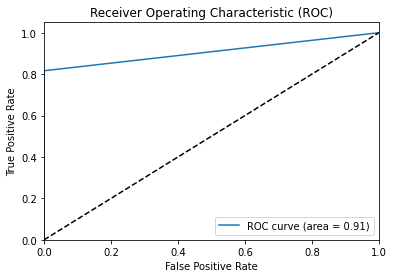

In [55]:
# Plot roc curve
plot_roc(y_pred,y_test)

# Naive Bayes

In [56]:
from sklearn.naive_bayes import BernoulliNB
kidneyNB = BernoulliNB()
y_pred = kidneyNB.fit(x_train, y_train)
y_pred = kidneyNB.predict(x_test)

In [57]:
#Acuracy
print("Bernoulli Naive Bayes model accuracy on test set:",metrics.accuracy_score(y_test, y_pred))


Bernoulli Naive Bayes model accuracy on test set: 0.89


[[51  0]
 [11 38]]


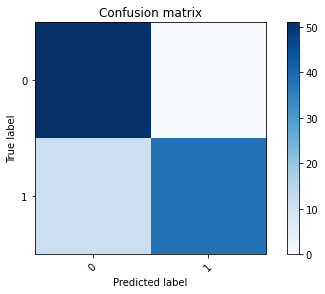

In [58]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])


In [59]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.82      1.00      0.90        51
           1       1.00      0.78      0.87        49

    accuracy                           0.89       100
   macro avg       0.91      0.89      0.89       100
weighted avg       0.91      0.89      0.89       100



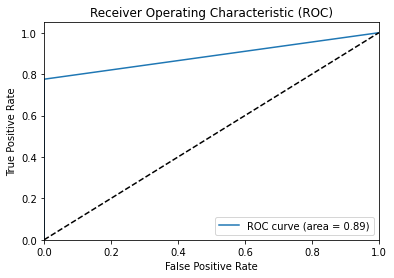

In [60]:
plot_roc(y_pred,y_test)

# Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
kidneyrf = RandomForestClassifier()
kidneyrf.fit(x_train,y_train)
y_pred=kidneyrf.predict(x_test)

In [62]:
#Accuracy
print("Accuracy of Random forest on test set:",metrics.accuracy_score(y_test, y_pred))

Accuracy of Random forest on test set: 0.96


[[51  0]
 [ 4 45]]


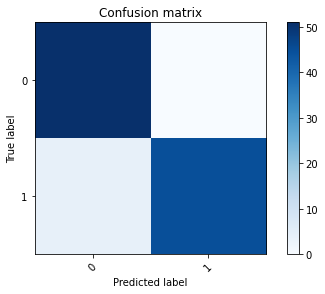

In [63]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [64]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        51
           1       1.00      0.92      0.96        49

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



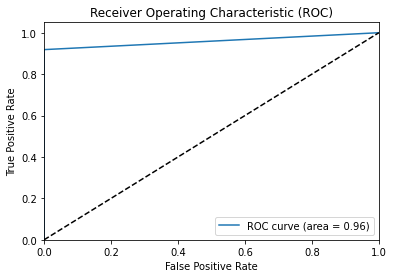

In [65]:
plot_roc(y_pred,y_test)

# XG-BOOST

In [66]:
# XG-Boost
from numpy import loadtxt
from xgboost import XGBClassifier
kidneyxgb=XGBClassifier()
kidneyxgb.fit(x_train,y_train)

[18:10:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [67]:
y_pred = kidneyxgb.predict(x_test)
predictions = [round(value) for value in y_pred]

In [68]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy for XGBoost on test set:", accuracy)

Accuracy for XGBoost on test set: 0.96


[[50  1]
 [ 3 46]]


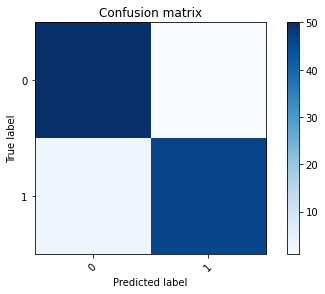

In [69]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
plot_confusion_matrix(cm,['0','1'])

In [70]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        51
           1       0.98      0.94      0.96        49

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100



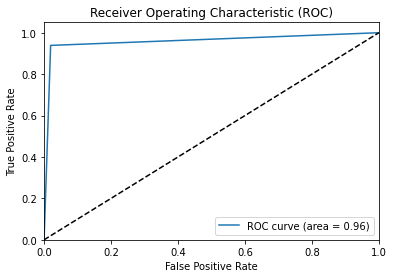

In [71]:
plot_roc(y_pred,y_test)

# Neural Network

In [72]:
# Neural Network
kidneynnmodel = Sequential()
kidneynnmodel.add(Dense(64, input_dim=x_train.shape[1], activation='tanh'))
kidneynnmodel.add(Dense(32, activation='tanh'))
kidneynnmodel.add(Dense(16, activation='tanh'))
kidneynnmodel.add(Dense(1, activation='sigmoid'))

kidneynnmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=20, 
                        verbose=2, mode='min')

# chckpt = ModelCheckpoint(filepath='.weights.hdf5', verbose=1, save_best_only=True)

kidneynnmodel.fit(x_train,y_train,verbose=2,epochs=200, batch_size=20, callbacks=[monitor], validation_split=0.25)


Epoch 1/200
15/15 - 0s - loss: 0.5504 - accuracy: 0.8400 - val_loss: 0.4409 - val_accuracy: 0.8700
Epoch 2/200
15/15 - 0s - loss: 0.3598 - accuracy: 0.9067 - val_loss: 0.3434 - val_accuracy: 0.8800
Epoch 3/200
15/15 - 0s - loss: 0.2735 - accuracy: 0.9133 - val_loss: 0.2966 - val_accuracy: 0.8800
Epoch 4/200
15/15 - 0s - loss: 0.2277 - accuracy: 0.9133 - val_loss: 0.2731 - val_accuracy: 0.8900
Epoch 5/200
15/15 - 0s - loss: 0.2057 - accuracy: 0.9200 - val_loss: 0.2557 - val_accuracy: 0.8900
Epoch 6/200
15/15 - 0s - loss: 0.1907 - accuracy: 0.9167 - val_loss: 0.2459 - val_accuracy: 0.8900
Epoch 7/200
15/15 - 0s - loss: 0.1829 - accuracy: 0.9267 - val_loss: 0.2482 - val_accuracy: 0.8900
Epoch 8/200
15/15 - 0s - loss: 0.1653 - accuracy: 0.9267 - val_loss: 0.2259 - val_accuracy: 0.8900
Epoch 9/200
15/15 - 0s - loss: 0.1547 - accuracy: 0.9433 - val_loss: 0.2208 - val_accuracy: 0.9000
Epoch 10/200
15/15 - 0s - loss: 0.1428 - accuracy: 0.9533 - val_loss: 0.2006 - val_accuracy: 0.9200
Epoch 11/

In [73]:
kidneynnmodel.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [74]:
y_pred = kidneynnmodel.predict(x_test)
argmax = []
for val in y_pred:
    if val >= 0.5:
      argmax.append(1)
    else:
        argmax.append(0)
argmax[:10]


[1, 0, 0, 0, 0, 1, 0, 0, 1, 1]

In [75]:
accuracy = accuracy_score(y_test,argmax)
print("Accuracy for neural network on test set:", accuracy)


Accuracy for neural network on test set: 0.97


[[51  0]
 [ 3 46]]


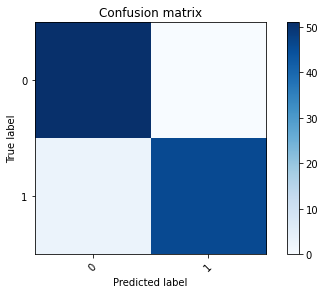

In [76]:
cm = confusion_matrix(y_test, argmax)
print(cm)
plot_confusion_matrix(cm,['0','1'])


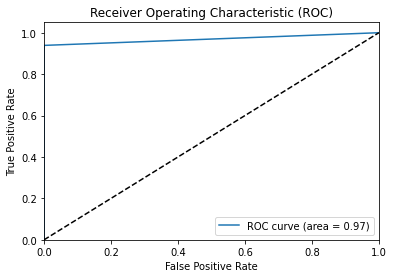

In [77]:
plot_roc(argmax,y_test)

# Saving Model

In [78]:
import pickle
pickle.dump(kidneyrf,open("C:/Users/prera/Desktop/FINALPROJECT/models/kidney_model.pkl","wb"))

In [79]:
print(x_test_1)

[[0.55681818 0.07692308 0.09967541 0.         0.         0.82334385
  0.67346939 0.         0.        ]]


In [80]:
# x_test_1=x_test[1,]

# x_test_1=x_test_1.reshape(1,-1)

# x_test_1
model=pickle.load(open("C:/Users/prera/Desktop/FINALPROJECT/models/kidney_model.pkl","rb"))
result = model.predict_proba(x_test_1)
print(result)

[[0.65 0.35]]
